# Preparing model

#### Import modules

In [2]:
 import keras

Using TensorFlow backend.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from keras.models import Sequential
from keras.layers import Dense

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#### y - inspected value, x - data model

In [26]:
dataset = pd.read_csv('/home/jovyan/work/note/ML/NN/Churn_Modelling.csv')

In [29]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [30]:
print(dataset)

      RowNumber  CustomerId         Surname  CreditScore Geography  Gender  \
0             1    15634602        Hargrave          619    France  Female   
1             2    15647311            Hill          608     Spain  Female   
2             3    15619304            Onio          502    France  Female   
3             4    15701354            Boni          699    France  Female   
4             5    15737888        Mitchell          850     Spain  Female   
5             6    15574012             Chu          645     Spain    Male   
6             7    15592531        Bartlett          822    France    Male   
7             8    15656148          Obinna          376   Germany  Female   
8             9    15792365              He          501    France    Male   
9            10    15592389              H?          684    France    Male   
10           11    15767821          Bearce          528    France    Male   
11           12    15737173         Andrews          497     Spa

limit_output extension: Maximum message size of 10000 exceeded with 11437 characters

#### Encoding categorical data

In [38]:
labelEncoder_X_1 = LabelEncoder()
X[:, 1] = labelEncoder_X_1.fit_transform(X[:, 1])
labelEncoder_X_2 = LabelEncoder()
X[:, 2] = labelEncoder_X_2.fit_transform(X[:, 2])

oneHotEncoder = OneHotEncoder(categorical_features=[1])
X = oneHotEncoder.fit_transform(X).toarray()
X = X[:, 1:]

In [40]:
#print(X)

#### Splitting dataset Training set and Test set

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Feature scaling

In [45]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
 print(X_test)

[[ 1.75486502 -0.57369368 -0.55204276 ...,  0.64259497  0.9687384
   1.61085707]
 [-0.5698444  -0.57369368 -1.31490297 ...,  0.64259497 -1.03227043
   0.49587037]
 [-0.5698444   1.74309049  0.57162971 ...,  0.64259497  0.9687384
  -0.42478674]
 ..., 
 [-0.5698444   1.74309049 -0.74791227 ...,  0.64259497 -1.03227043
   0.71888467]
 [ 1.75486502 -0.57369368 -0.00566991 ...,  0.64259497  0.9687384
  -1.54507805]
 [ 1.75486502 -0.57369368 -0.79945688 ...,  0.64259497 -1.03227043
   1.61255917]]


# _Create Classifier_

#### Predict test result

In [50]:
classifier = Sequential()

In [42]:
Y_pred = classifier.predict(X_test) # vector of prediction

In [43]:
print(Y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


#### Evaluate correletion

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
cm = confusion_matrix(Y_test, Y_pred)

In [46]:
print(cm)

[[65  3]
 [ 8 24]]


#### Visualisation: Make a graph

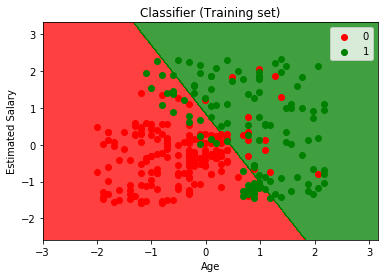

In [33]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

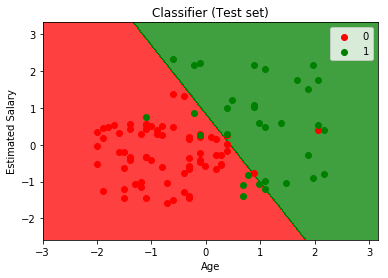

In [47]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()